In [68]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import itertools
%matplotlib inline

In [12]:
data = np.load('galaxy_catalogue.npy')
np.random.shuffle(data)

# Split data into features and targets
targets = data['class']
features = np.zeros((len(data), 13))
features[:, 0] = data['u-g']
features[:, 1] = data['g-r']
features[:, 2] = data['r-i']
features[:, 3] = data['i-z']
features[:, 4] = data['ecc']
features[:, 5] = data['m4_u']
features[:, 6] = data['m4_g']
features[:, 7] = data['m4_r']
features[:, 8] = data['m4_i']
features[:, 9] = data['m4_z']
features[:, 10] = data['petroR50_u'] / data['petroR90_u']
features[:, 11] = data['petroR50_r'] / data['petroR90_r']
features[:, 12] = data['petroR50_z'] / data['petroR90_z']

In [54]:
# Create and train regression model
model = DecisionTreeClassifier()
predictions = cross_val_predict(model, features, targets, cv = 10)

accuracy = sum(predictions == targets) / len(predictions)
print(accuracy)

0.797435897436


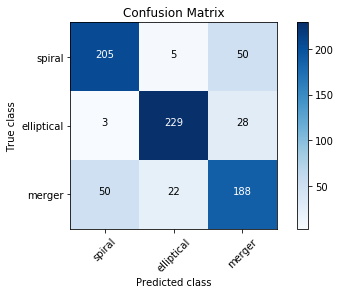

In [55]:
# Create confusion matrix
labels = list(set(targets))
cm = confusion_matrix(y_true = targets, y_pred = predictions, labels = labels)

# Plot confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators = 50)